## Machine Learning Online Class 
##  Exercise 6 - Part 1 | Support Vector Machines
Requires : scipy, scikit-learn

### Introduction

In the first part of this exercise, we will be using support vector machines (SVMs) with various example 2D datasets.<br> Experimenting with these datasets will help us gain an intuition of how SVMs work and how to use a Gaussian kernel with SVMs.

### Python imports

In [25]:
import warnings
warnings.filterwarnings('ignore')

import math
import itertools

import numpy as np

import matplotlib.pyplot as plt

from scipy.io import loadmat

from sklearn.svm import LinearSVC 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from sklearn.metrics import accuracy_score

%matplotlib inline

### Part 1: Loading and Visualizing Data

We will begin by with a 2D example dataset which can be separated by a
linear boundary.

In [26]:
data = loadmat('ex6data1.mat')
X = data['X']
y = data['y']

In [27]:
# Re-use function of assignment 2 (logistic regression) 
def plotData(X,y,x_label='',y_label='',neg_legend='',pos_legend=''):
    
    #Split between positive (y=1) and negative data(y=0)
    pos = X[np.where(y==1)[0]]
    neg = X[np.where(y==0)[0]]
    
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.plot(pos[:,0],pos[:,1], linestyle='None', marker='+', color='black', markersize=6, label=pos_legend)
    ax.plot(neg[:,0],neg[:,1], linestyle='None', marker='o', color='#d8ca04', markersize=6, label=neg_legend)
    ax.legend()
    return ax
    #plt.show()

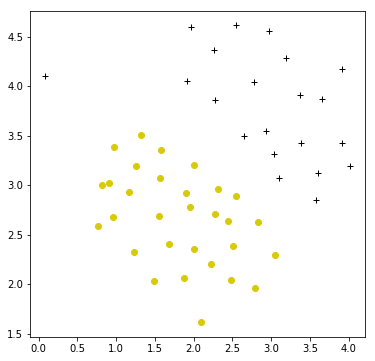

In [28]:
ax = plotData(X,y)

### Part 2: Training Linear SVM
We use scikit-learn SVM LinearSVC

In [29]:
# Model 1, C = 1 (ie low penalty / high regularization)

model_1 = LinearSVC(tol = 1e-3, C = 1)
model_1.fit(X,y)

# Coefs (w0*x0 + w1*x1 + b =0)
b_1 = model_1.intercept_[0]
w0_1 = model_1.coef_[0,0]
w1_1 = model_1.coef_[0,1]

# Model 2, C = 100 (ie high penalty / low regularization)

model_100 = LinearSVC(tol = 1e-3, C = 100)
model_100.fit(X,y)

# Coefs (w0*x0 + w1*x1 + b =0)
b_100 = model_100.intercept_[0]
w0_100 = model_100.coef_[0,0]
w1_100 = model_100.coef_[0,1]

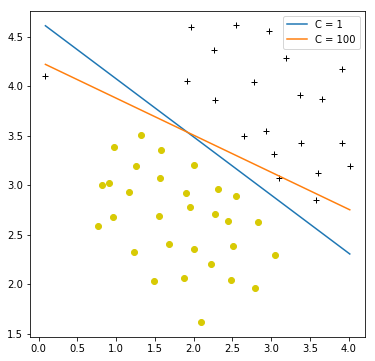

In [30]:
ax = plotData(X,y)
ax.plot(np.linspace(np.min(X[:,0]),np.max(X[:,0]),100),
        -(w0_1*np.linspace(np.min(X[:,0]),np.max(X[:,0]),100) + b_1)/w1_1, label = 'C = 1')
ax.plot(np.linspace(np.min(X[:,0]),np.max(X[:,0]),100),
        -(w0_100*np.linspace(np.min(X[:,0]),np.max(X[:,0]),100) + b_100)/w1_100, label = 'C = 100')
ax.legend()

### Part 3: Implementing Gaussian Kernel
In this part of the exercise, we will be using SVMs to do non-linear classification.<br>
In particular, we will be using SVMs with Gaussian kernels on datasets that are not linearly separable.<br>
Note : We will use the built-in rbf (= gaussian) kernel later on

In [31]:
def gaussianKernel(x1, x2, sigma):
    
    # Ensure that x1 and x2 are column vectors
    x1 = x1.reshape(-1,1)
    x2 = x2.reshape(-1,1)
    
    return np.asscalar(np.exp(-((x1-x2).T.dot(x1-x2)) / (2*sigma**2)))

In [32]:
x1 = np.array([1,2,1])
x2 = np.array([0,4,-1])
sigma = 2
sim = gaussianKernel(x1, x2, sigma)

In [33]:
print("Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = 2 : {:2.6f}".format(sim))
print('This value should be about 0.324652')

Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = 2 : 0.324652
This value should be about 0.324652


### Part 4: Visualizing Dataset 2

In [34]:
data = loadmat('ex6data2.mat')
X = data['X']
y = data['y']

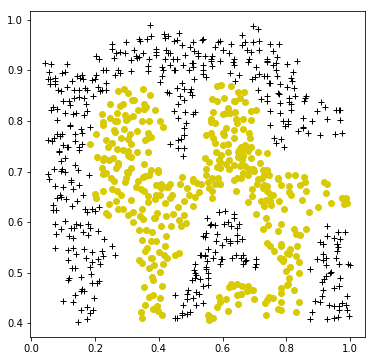

In [35]:
ax = plotData(X,y)

### Part 5: Training SVM with RBF Kernel (Dataset 2)
We use scikit-learn SVC with  RBF kernel (= gaussian)

In [36]:
# SVM parameters
C = 1; sigma = 0.1

In [37]:
# sklearn SVC uses a parameter gamma called the kernel coefficient which
# equals 1/(2*sigma^2) for gaussian kernel
model = SVC(C,kernel = 'rbf', gamma = 1 / (2*sigma**2))

In [38]:
model.fit(X,y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=49.99999999999999,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [39]:
def visualizeBoundary(X, y, model):
    
    # Plot training data
    ax = plotData(X,y)
    
    # Make classification predictions over a grid of values
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(len(xx),len(yy))  
    cp = plt.contour(xx,yy,Z,[0.5], linewidths=2, colors='r')  
    ax.clabel(cp)
    

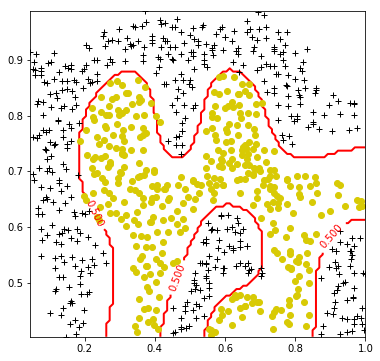

In [40]:
visualizeBoundary(X, y, model)

### Part 6: Visualizing Dataset 3

In [41]:
data = loadmat('ex6data3.mat')
X, y, Xval, yval = data['X'], data['y'], data['Xval'], data['yval']

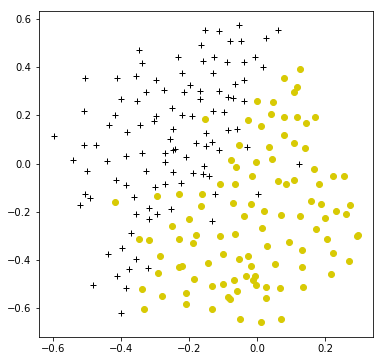

In [42]:
plotData(X,y)

### Part 7: Training SVM with RBF Kernel (Dataset 3)

We will use the cross validation set Xval, yval to determine the best $C$ and $\sigma$ parameter to use.

In [43]:
# Set of possible parameters
C_range = np.geomspace(0.01,30,20)
sigma_range = np.geomspace(0.01,30,20)

# sklearn SVC uses a parameter gamma called the kernel coefficient which
# equals 1/(2*sigma^2) for gaussian kernel
gamma_range = 1 / (2*sigma_range** 2)

#Initalize temp variables
score = 0
C_best = 0
gamma_best = 0


#Iterate over all combination of Cs and gammas
for x in itertools.product(C_range, gamma_range):
    C = x[0]
    gamma = x[1] 
    model = SVC(C, kernel = 'rbf', gamma = gamma)
    # Fit model on X and y
    model.fit(X,y)
    
    # Run predictions on validation set
    y_pred = model.predict(Xval)
    
    # Check if accuracy is better
    if accuracy_score(yval,y_pred) > score:
        C_best = C
        gamma_best = gamma
        score = accuracy_score(yval,y_pred)
        model_best = model
            
print('Optimal C is around : {:2.2f}'.format(C_best))
print('Optimal gamma is around : {:2.5f} (sigma = {:2.2f} )'.format(gamma_best, np.sqrt(1 / (2 * gamma_best))))
print('Accuracy is : {}%'.format(score*100))


Optimal C is around : 0.29
Optimal gamma is around : 73.94455 (sigma = 0.08 )
Accuracy is : 97.0%


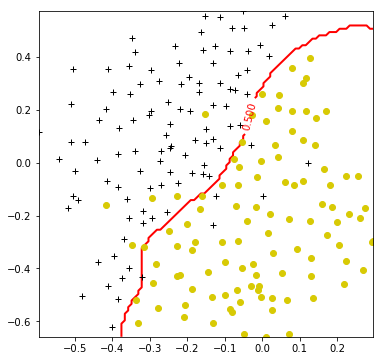

In [44]:
visualizeBoundary(X, y, model_best)

### Hyperparameters tuning using sklearn GridSearchCV

In [45]:
# We use K-fold cross-validation here
# cf https://en.wikipedia.org/wiki/Cross-validation_(statistics)#k-fold_cross-validation

# we first aggregate training set and validation set in a single data set
# We'll let sklearn perform K-fold validation on this dataset

Xtot = np.r_[X,Xval]
ytot = np.r_[y,yval]


# Set of possible parameters
C_range = np.geomspace(0.01,30,20)
sigma_range = np.geomspace(0.01,30,20)
gamma_range = 1 / (2*sigma_range** 2)

# Set range of parameters
parameters = dict(C= C_range, gamma = gamma_range)

model = SVC(kernel='rbf')

clf = GridSearchCV(estimator=model, param_grid=parameters)
clf.fit(Xtot, ytot[:,0])


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-02,   1.52408e-02,   2.32281e-02,   3.54013e-02,
         5.39542e-02,   8.22303e-02,   1.25325e-01,   1.91005e-01,
         2.91106e-01,   4.43667e-01,   6.76182e-01,   1.03055e+00,
         1.57064e+00,   2.39377e+00,   3.64829e+00,   5.56027e+00,
         8.4742...,   3.75657e-02,   1.61726e-02,
         6.96251e-03,   2.99746e-03,   1.29045e-03,   5.55556e-04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [46]:
# Retrieve best estimators
C_cv = clf.best_estimator_.C
gamma_cv = clf.best_estimator_.gamma
score_cv = clf.best_score_

print('Optimal C is around : {:2.2f}'.format(C_cv))
print('Optimal gamma is around : {:2.5f} (sigma = {:2.2f} )'.format(gamma_cv, np.sqrt(1 / (2 * gamma_cv))))
print('Accuracy is : {:2.1f}%'.format(score_cv*100))

model_cv = SVC(C = C_cv, gamma = gamma_cv, kernel='rbf')
model_cv.fit(X,y)

Optimal C is around : 2.39
Optimal gamma is around : 31.83416 (sigma = 0.13 )
Accuracy is : 93.2%


SVC(C=2.3937729978355513, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=31.834162028703357,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

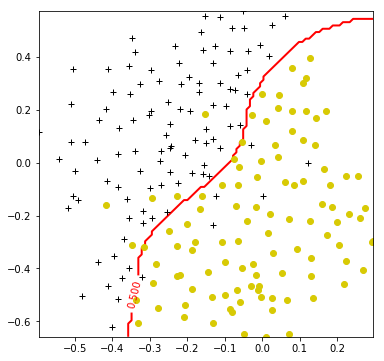

In [47]:
visualizeBoundary(X, y, model_cv)